<a href="https://colab.research.google.com/github/tathagatsathe/kaggle/blob/main/Investment_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install PyPortfolioOpt
import yfinance as yf

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime

plt.rcParams["figure.figsize"] = (15, 7.5)

In [3]:
end = datetime.now()
start = datetime(end.year -5 , end.month, end.day)

stocks = ['AAPL','MSFT','GOOG','AMZN']

df = pd.DataFrame()
for stock in stocks:
  globals()[stock] = yf.download(stock,start,end)
  globals()[stock]['Ticker'] = stock
  df = df.append(globals()[stock])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-03-20,43.810001,44.200001,43.735001,43.810001,41.764996,78597600,AAPL
2018-03-21,43.759998,43.772499,42.814999,42.817501,40.818825,148219600,AAPL
2018-03-22,42.500000,43.169998,42.150002,42.212502,40.242069,165963200,AAPL
2018-03-23,42.097500,42.480000,41.235001,41.235001,39.310196,164115200,AAPL
2018-03-26,42.017502,43.275002,41.610001,43.192501,41.176319,150164800,AAPL
...,...,...,...,...,...,...,...
2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700,AMZN
2023-03-15,93.220001,96.669998,93.070000,96.199997,96.199997,70731800,AMZN
2023-03-16,95.750000,100.989998,95.610001,100.040001,100.040001,84446900,AMZN


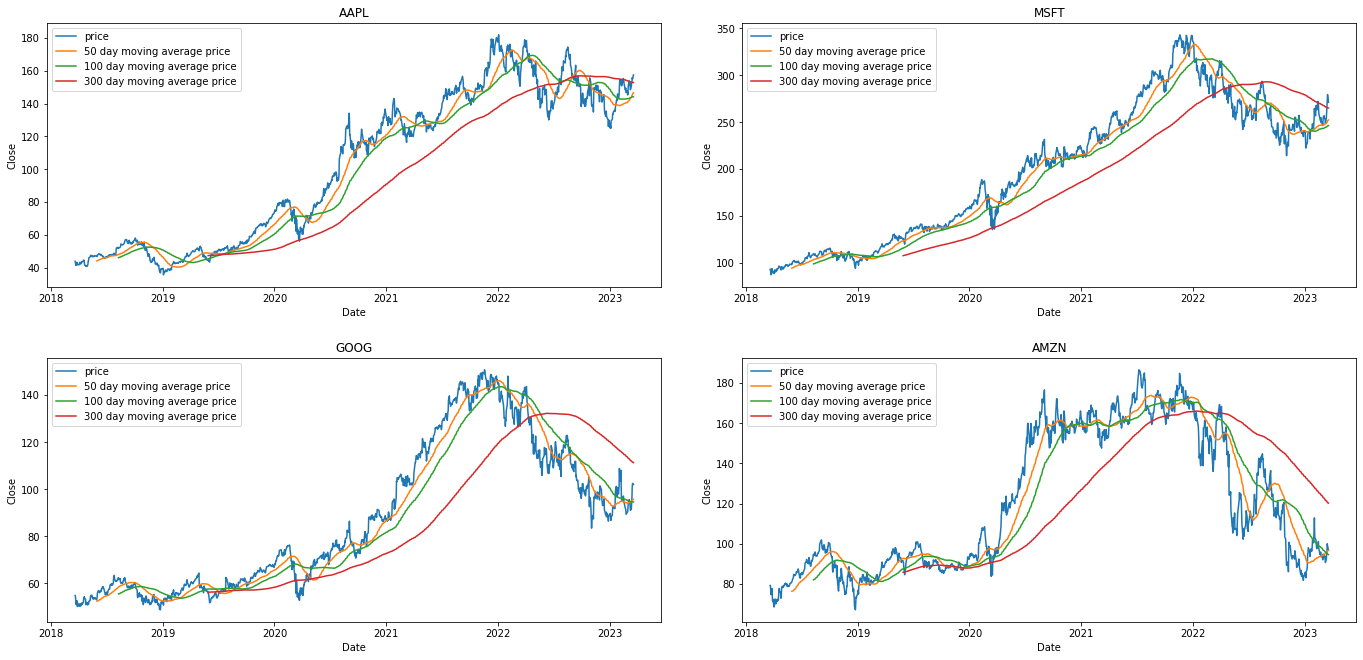

In [5]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout(pad=5)

for (i, ax), stock in zip(enumerate(axes.ravel()),stocks):
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'],ax=ax, label='price').set(title=stock)
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'].rolling(50).mean(),ax=ax, label='50 day moving average price')
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'].rolling(100).mean(),ax=ax, label='100 day moving average price')
  sns.lineplot(x=df.loc[df['Ticker']==stock,'Close'].index,y=df.loc[df['Ticker']==stock,'Close'].rolling(300).mean(),ax=ax, label='300 day moving average price')

In [6]:
for stock in stocks:
  df.loc[df['Ticker']==stock,'Daily Return'] =  df.loc[df['Ticker']==stock,'Adj Close'].pct_change()

Daily Returns 

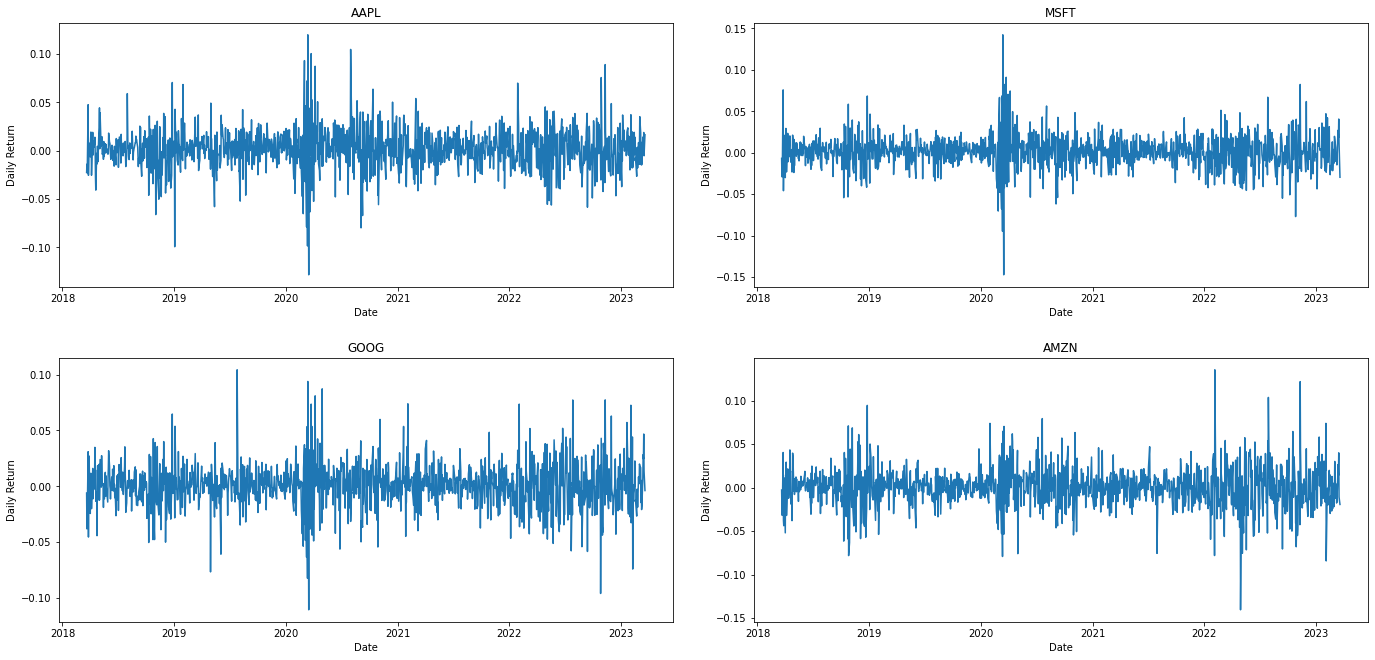

In [7]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
fig.tight_layout(pad=5)

for (i, ax), stock in zip(enumerate(axes.ravel()),stocks):
  sns.lineplot(data=df[df['Ticker']==stock],x=df[df['Ticker']==stock].index,y='Daily Return',ax=ax).set(title=stock)

In [8]:
daily_return_df = df.reset_index().pivot(index='Date',columns='Ticker',values='Daily Return').dropna()
closing_price_df = df.reset_index().pivot(index='Date',columns='Ticker',values='Adj Close').dropna()
daily_return_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-21,-0.022655,-0.002931,-0.006222,-0.006979
2018-03-22,-0.014130,-0.023352,-0.038318,-0.029087
2018-03-23,-0.023157,-0.031950,-0.026223,-0.029068
2018-03-26,0.047472,0.040319,0.030972,0.075705
2018-03-27,-0.025641,-0.037799,-0.045679,-0.045959


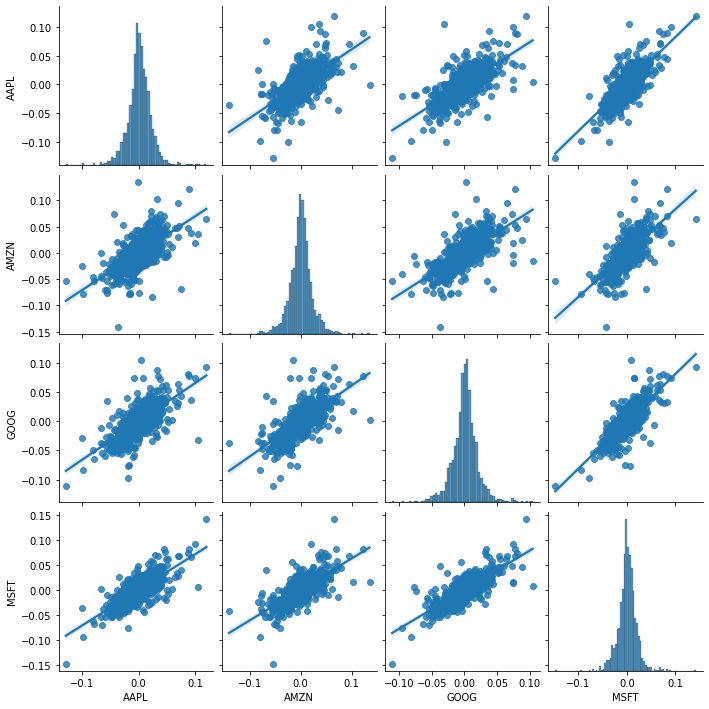

In [9]:
sns.pairplot(daily_return_df,kind='reg')

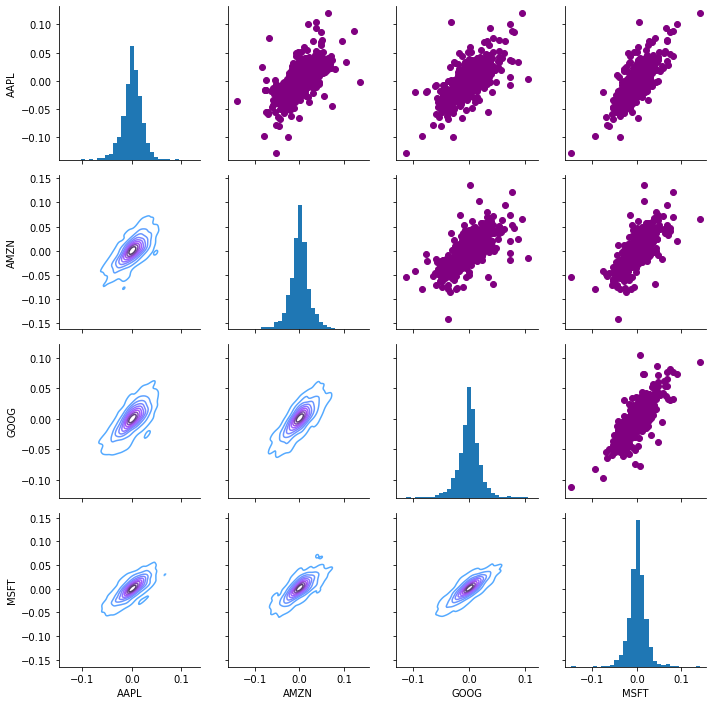

In [10]:
fig = sns.PairGrid(daily_return_df.dropna())

fig.map_upper(plt.scatter,color='purple')

fig.map_lower(sns.kdeplot, cmap='cool_d')

fig.map_diag(plt.hist, bins=30)

[Text(0.5, 1.0, 'Closing Price Correlation')]

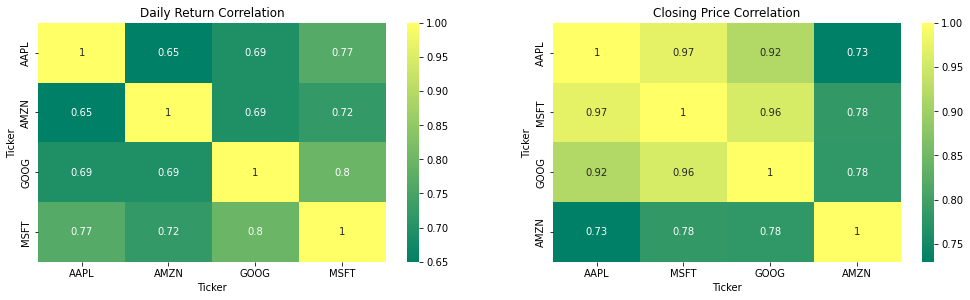

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
fig.tight_layout(pad=5)

sns.heatmap(daily_return_df.corr(),annot=True,cmap='summer',ax=axes[0]).set(title='Daily Return Correlation')
sns.heatmap(closing_price_df[stocks].corr(),annot=True,cmap='summer',ax=axes[1]).set(title='Closing Price Correlation')

**Modern Portfolio Theory**

Modern Portfolio Theory (MPT) is an investment theory developed by Harry Markowitz in 1952 that describes how investors can construct portfolios that maximize expected return for a given level of risk. MPT assumes that investors are rational and risk-averse, meaning they will only take on additional risk if they expect to be compensated with higher returns.

MPT is based on the idea that an investor's portfolio should be diversified across multiple assets to reduce the overall risk of the portfolio. According to MPT, the risk of an individual asset should not be considered in isolation, but rather in the context of the entire portfolio. MPT defines risk as the volatility of returns and assumes that investors are only concerned with the variability of their returns and not their absolute level.

The goal is to find the portfolio with the highest expected return for a given level of risk, or the lowest risk for a given level of expected return. The optimal portfolio is found by plotting the risk-return tradeoff, known as the efficient frontier, and selecting the portfolio with the highest return for a given level of risk or the lowest risk for a given level of return.


In [12]:
returns = []
volatility = []
portfolio_weights = []

variance_matrix = daily_return_df.cov()*252
variance_matrix

num_assets = len(daily_return_df.columns)
num_portfolios = 10000

individual_rets = closing_price_df.resample('Y').last().pct_change().mean()

for port in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights = weights/np.sum(weights)
  portfolio_weights.append(weights)

  returns.append(np.dot(weights, individual_rets))
  var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  sd = np.sqrt(var)

  ann_sd = sd*np.sqrt(250)
  volatility.append(ann_sd)

In [13]:
data = {'Returns': returns, 'Volatility':volatility}

for counter, symbol in enumerate(closing_price_df.columns.tolist()):
  data[symbol+' weight'] = [w[counter] for w in portfolio_weights]

In [14]:
portfolios_V1 = pd.DataFrame(data)
portfolios_V1.head()

,Returns,Volatility,AAPL weight,AMZN weight,GOOG weight,MSFT weight
0,0.248244,4.771899,0.187631,0.347471,0.031869,0.433029
1,0.259448,4.701607,0.254815,0.281648,0.121934,0.341603
2,0.238196,4.765340,0.201561,0.386172,0.119652,0.292614
3,0.225167,4.796898,0.208471,0.433219,0.220174,0.138137
4,0.293566,4.671618,0.403500,0.132059,0.200205,0.264236


In [15]:
min_volatility_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()] #minimum volatility portfolio
min_volatility_port

Returns        0.267941
Volatility     4.628103
AAPL weight    0.248881
AMZN weight    0.105717
GOOG weight    0.335878
MSFT weight    0.309524
Name: 3645, dtype: float64

In [16]:
rf = 0.01 #maximum risk to be taken
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]  #optimal risk portfolio
optimal_risky_port

Returns        0.390316
Volatility     5.197373
AAPL weight    0.934749
AMZN weight    0.014458
GOOG weight    0.017856
MSFT weight    0.032937
Name: 1263, dtype: float64

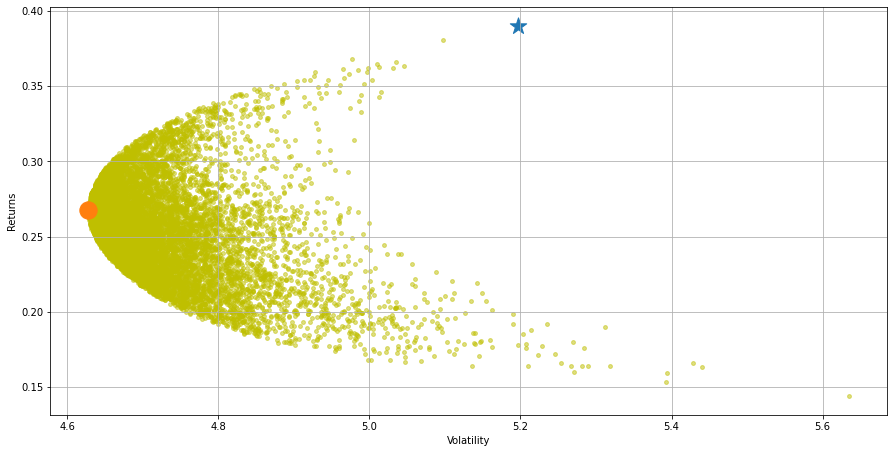

In [17]:
portfolios_V1.plot.scatter(x='Volatility',y='Returns',marker='o',color='y',s=15, alpha=0.5, grid=True)
plt.scatter(optimal_risky_port[1],optimal_risky_port[0],marker='*',s=300)
plt.scatter(min_volatility_port[1],min_volatility_port[0],marker='o',s=300)

**Mean Variance Optimization**

Mean Variance Optimization is a portfolio optimization technique that seeks to find the portfolio with the highest expected return for a given level of risk, or the lowest risk for a given level of expected return. MVO considers the expected returns of individual assets and their covariance matrix, and uses these inputs to mathematically optimize the portfolio.



In [18]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(closing_price_df[stocks])
S = CovarianceShrinkage(closing_price_df[stocks]).ledoit_wolf()

In [19]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.72285, 'MSFT': 0.27715, 'GOOG': 0.0, 'AMZN': 0.0}


In [20]:
ef.portfolio_performance(verbose=True)

Expected annual return: 29.0%
Annual volatility: 31.3%
Sharpe Ratio: 0.86


(0.29037149089005543, 0.31293390858310316, 0.8639891155108081)

In [21]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(closing_price_df[stocks])

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL': 458, 'MSFT': 102}
Funds remaining: $196.51


**Hierarchical Risk Parity (HRP)**

Hierarchical Risk Parity is a portfolio optimization technique that takes into account the hierarchical structure of the market to build a diversified portfolio. The idea behind HRP is to cluster assets based on their similarity, and then allocate risk equally within each cluster, and then allocate capital to the clusters based on their total risk contribution to the portfolio.

In [22]:
from pypfopt import HRPOpt

hrp = HRPOpt(daily_return_df)
hrp_weights = hrp.optimize()

hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 22.4%
Annual volatility: 29.4%
Sharpe Ratio: 0.69
{'AAPL': 0.25510093958354313, 'AMZN': 0.2171847823090424, 'GOOG': 0.25869046389460654, 'MSFT': 0.2690238142128079}


In [23]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'MSFT': 99, 'GOOG': 253, 'AAPL': 162, 'AMZN': 224}
Funds remaining (HRP): $84.13


**Mean Conditional Value at Risk (mCVAR)**

Mean Conditional Value at Risk is a portfolio optimization technique that considers the worst-case scenario when constructing a portfolio. CVaR seeks to minimize the expected loss of the portfolio beyond a certain level of risk. It takes into account the tail risk, which is the risk of extreme events that are unlikely to occur, but can have a significant impact on the portfolio.

In [24]:
from pypfopt.efficient_frontier import EfficientCVaR

S = closing_price_df[stocks].cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.0, 'MSFT': 1.0, 'GOOG': 0.0, 'AMZN': 0.0}


In [25]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'MSFT': 368, 'AAPL': 1}
Funds remaining (CVAR): $68.47


**Black-Litterman Model**

The Black-Litterman model is a portfolio optimization technique that combines the views of the investor with the market equilibrium to construct a portfolio. The model takes the market equilibrium as a starting point, and then adjusts the weights of the assets based on the investor's views. It takes into account the uncertainty of the views and uses a Bayesian approach to update the weights of the assets. The model also adjusts the weights of the assets to reflect the investor's risk tolerance.

In [26]:
from pypfopt import expected_returns, risk_models
from pypfopt.black_litterman import BlackLittermanModel

n_assets = 4
mu = expected_returns.mean_historical_return(closing_price_df[stocks])
S = risk_models.sample_cov(closing_price_df[stocks])

# Specify your views and confidence levels
viewdict = {
    'AAPL': 0.05,
    'MSFT': 0.04,
    'AMZN': 0.03,
    'GOOG': 0.02
}
confidences = {
    'AAPL': 0.6,
    'MSFT': 0.7,
    'AMZN': 0.8,
    'GOOG': 0.9
}

Q = np.array(list(viewdict.values())).reshape(-1, 1)

# Specify the link matrix
P = np.eye(n_assets)

# Specify the uncertainty matrix
omega = np.diag(np.array(list(confidences.values())))

# Compute Black-Litterman expected returns
bl = BlackLittermanModel(S, pi=mu,Q=Q, P=P, omega=omega)
# bl.set_views(viewdict, confidences)
bl_returns = bl.bl_returns()

# Optimize the portfolio
ef = EfficientFrontier(bl_returns, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Print the results
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.73351), ('MSFT', 0.26649), ('GOOG', 0.0), ('AMZN', 0.0)])
Expected annual return: 28.7%
Annual volatility: 31.4%
Sharpe Ratio: 0.85


(0.28694083653937624, 0.314170352650282, 0.8496690864924509)